In [2]:
%load_ext autoreload


In [3]:
%autoreload 2

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
''' Sn properties - Masses, Ratios, Cup Configurations, ... '''
from sn_config import *
'''Classes for Reading in the Data and applying Internal Normalisation'''
from nu_data_reduction import NU_data_read, int_norm, evaluation
from pylab import plot, show, savefig
from scipy import stats
#%pylab inline

In [5]:
path = "/Volumes/friebelm/PhD/NU Plasma/Measurements/2016-01-28/"
path_sav = "/Volumes/friebelm/PhD/NU Plasma/Measurements/compilation/"
files_start = 3145
files_end = 3181


In [18]:
# cup configuration
#cup_config = cycle_Sb
cup_config = cycles2
# Isotopes used for Interference correction
corr_isotopes_1 = {"Cd" : "111", "Te" : "126"}
corr_isotopes_2 = {"Cd" : "111","Te" : "125", "Xe" : "129"}
corr_isotopes_Sb = {"Te": "125"}
# Mass Range of cup configuration
mass_range = cycles2_mass_range
#isotopes = [["111", "112", "114", "115", "116", "117", "118", "119", "122", "124"], ["117", "118", "119", "122", "124"]]
isotopes = [["112", "114", "115", "116", "117", "118", "119", "122", "124"]]
#isotopes = [["116", "117", "118", "119", "122", "124"]]
isotope_column = ["112", "114", "115", "116", "117", "118", "119", "122", "124"]
data_sample_column = [(i + "/" + "120") for i in isotope_column]

denom_isotope = "120"
norm_ratio = ["122","120"]
#number of iterations for beta
iter_beta = 10

# Interference_corr on the denominator isotope
isotope_denom_corr = True

blk_corr = False

In [7]:
columns_1 = ["cycle", "sample", "date", "H8 (1)", "H7 (1)", "H6 (1)", "H5 (1)", "H4 (1)", "H3 (1)", "H2 (1)", "H1 (1)", "Ax (1)", "L1 (1)", "L2 (1)", "L3 (1)", "L4 (1)"]
columns_2 = ["cycle", "H8 (2)", "H7 (2)", "H6 (2)", "H5 (2)", "H4 (2)", "H3 (2)", "H2 (2)", "H1 (2)", "Ax (2)", "L1 (2)", "L2 (2)", "L3 (2)", "L4 (2)"]
df_all = pd.DataFrame()
blk_ls = []
sample_ls = []
files_1 = range(files_start, files_end, 1)
for sample in files_1:
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    df_zero = df.data_zero_corr(sample)
    df_zero_1 = pd.DataFrame(df_zero["cycle1"])
    df_zero_2 = pd.DataFrame(df_zero["cycle2"])
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    df_zero_1["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    df_zero_1["sample"] = sample_name
    df_zero_1["cycle"] = df_zero_1.index.values
    df_zero_2["cycle"] = df_zero_2.index.values
    df_zero_1.index = df_zero_1["date"]
    df_zero_1 = df_zero_1[columns_1]
    df_zero_2 = df_zero_2[columns_2]
    df_all = df_all.append(df_zero_1.merge(df_zero_2), ignore_index = True)
    #df_all = df_all.append(df_zero_1, ignore_index = True)
    
    if sample_name == "blank sol" or sample_name == "wash" or sample_name == "wash clean":
        blk_ls.append(sample)
    elif sample_name == "SQ" or sample_name == "teflon blank" or sample_name == "4ml HDPE blank":
        None
    else:
        sample_ls.append(sample)

df_all.set_index("date", inplace = True)
df_all
#for x in [123]:
#    sample_ls.remove(x)
#blk_ls

,cycle,sample,H8 (1),H7 (1),H6 (1),H5 (1),H4 (1),H3 (1),H2 (1),H1 (1),...,H5 (2),H4 (2),H3 (2),H2 (2),H1 (2),Ax (2),L1 (2),L2 (2),L3 (2),L4 (2)
date,,,,,,,,,,,,,,,,,,,,,
2016-01-28 16:04:00,1,NIST 100ppb,2.121732,1.655844,11.361799,2.954990,8.225448,2.571297,4.810400,0.110284,...,0.000131,0.000059,2.135687,0.006282,1.666760,0.008118,11.437678,2.974184,8.279321,2.588391
2016-01-28 16:04:00,2,NIST 100ppb,2.130783,1.662858,11.410387,2.967672,8.260505,2.582342,4.831269,0.110795,...,0.000130,0.000085,2.140639,0.006261,1.670395,0.008096,11.462640,2.980696,8.296746,2.593801
2016-01-28 16:04:00,3,NIST 100ppb,2.122581,1.656454,11.365948,2.955990,8.227955,2.572123,4.812033,0.110405,...,0.000098,0.000120,2.120823,0.006115,1.655312,0.007931,11.358467,2.953615,8.221867,2.570131
2016-01-28 16:04:00,4,NIST 100ppb,2.139748,1.669860,11.458399,2.980162,8.295342,2.593152,4.851874,0.111440,...,0.000128,0.000082,2.160618,0.006364,1.686356,0.008216,11.571190,3.008982,8.375920,2.618381
2016-01-28 16:04:00,5,NIST 100ppb,2.102177,1.640855,11.260167,2.928810,8.153404,2.549200,4.769552,0.109392,...,0.000133,0.000078,2.169533,0.006589,1.693587,0.008449,11.621348,3.022098,8.412516,2.629997
2016-01-28 16:04:00,6,NIST 100ppb,2.166675,1.690870,11.602404,3.017485,8.399415,2.625729,4.912533,0.112633,...,0.000159,0.000073,2.139765,0.006332,1.670276,0.008150,11.460566,2.980020,8.296049,2.593422
2016-01-28 16:04:00,7,NIST 100ppb,2.140372,1.670539,11.460944,2.980949,8.297677,2.593856,4.852832,0.111272,...,0.000121,0.000069,2.162458,0.006326,1.687596,0.008109,11.580866,3.011642,8.382569,2.620480
2016-01-28 16:04:00,8,NIST 100ppb,2.162083,1.687306,11.577839,3.011329,8.381791,2.620170,4.902174,0.112528,...,0.000131,0.000100,2.164838,0.006411,1.689767,0.008265,11.594101,3.014828,8.392518,2.623421
2016-01-28 16:04:00,9,NIST 100ppb,2.155026,1.681837,11.540085,3.001270,8.354281,2.611801,4.885954,0.112029,...,0.000144,0.000086,2.157237,0.006332,1.683747,0.008221,11.553051,3.004360,8.362811,2.614534


In [19]:
files_1 = range(files_start, files_end, 1)
df_raw_signals = pd.DataFrame()
df_internal_norm = pd.DataFrame()

for sample in sample_ls:
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    # arbitrary blank positions
    #blk1 = [item for item in blk_ls if item < sample]
    #blk2 = [item for item in blk_ls if item > sample]
    #blk1 = blk1[-1]
    #blk2 = blk2[0]
    #blk_corr_sample = True
    
    # blank measurement surrounds sample
    #if ((sample-1) in blk_ls) and ((sample+1) in blk_ls):
    #    blk1 = sample-1
    #    blk2 = sample+1
    #    blk_corr_sample = True
    #else:
    #    blk_corr_sample = False
    
    if (blk_corr == True) and (blk_corr_sample == True):
        blk_1 = NU_data_read(path, blk1, cup_config)
        blk_2 = NU_data_read(path, blk2, cup_config)
        df_zero = df.data_zero_corr(sample)
        df_bgd_1 = blk_1.data_zero_corr(blk1)
        df_bgd_2 = blk_2.data_zero_corr(blk2)
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        new_corr.line2_corr(df_zero, "119")
        new_corr.data_bgd_corr(df_bgd_1, df_bgd_2)
    else:
        df_zero = df.data_zero_corr(sample)
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        new_corr.line2_corr(df_zero, "119")
    
    data_sample_raw = new_corr.raw_signals(denom_isotope)
    data_sample_raw = pd.DataFrame.from_dict(data_sample_raw, orient = 'index')
    data_sample_raw = new_corr.mad_outlier_rejection(data_sample_raw)
    
    data_sample = new_corr.internal_norm_1(norm_ratio, denom_isotope, iter_beta)
    data_sample = pd.DataFrame.from_dict(data_sample, orient = 'index')
    data_sample = new_corr.mad_outlier_rejection(data_sample)
    
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    data_sample = data_sample.drop(denom_isotope, axis=1)
    data_sample = data_sample[sorted(data_sample.columns)]
    data_sample.columns = data_sample_column
    data_sample["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    data_sample["sample"] = sample_name
    data_sample["cycle"] = data_sample.index.values
    
    data_sample_raw["cycle"] = data_sample_raw.index.values
    data_sample = data_sample.merge(data_sample_raw)
    
    df_internal_norm = df_internal_norm.append(data_sample)

In [20]:
df_internal_norm= df_internal_norm.set_index("date")
columns = ["cycle", "sample"]
columns.extend(data_sample_column)
columns.extend(sorted(data_sample_raw.drop("cycle", axis=1).columns))
df_internal_sub = pd.DataFrame(df_internal_norm, columns = columns)

df_all_sub = df_all[(df_all["sample"] != "blank sol") & (df_all["sample"] != "SQ") & (df_all["sample"] != "teflon blank")]
df_internal_sub["111"] = df_all_sub["L3 (1)"]
df_internal_sub["125"] = df_all_sub["H5 (2)"]
df_internal_sub["Cd/Sn"] = (df_all_sub["L3 (1)"]/12.722)/(df_all_sub["H4 (1)"]/24.223)
df_internal_sub["Te/Sn"] = (df_all_sub["H5 (2)"]/7.0509)/(df_all_sub["H4 (1)"]/24.223)
#df_external_sub.to_csv(path_sav + "Sn_H9_L4_internal_corr_all.csv")

In [21]:
df_internal_norm

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,sample,...,120,122,115,114,117,116,124,112,119,118
date,,,,,,,,,,,,,,,,,,,,,
2016-01-28 16:04:00,0.029815,0.020186,0.010361,0.445917,0.235268,0.742865,0.263437,NaN,0.177574,NIST 100ppb,...,11.361799,1.655844,0.110284,0.214613,2.571297,4.810400,2.121732,0.306914,2.954990,8.225448
2016-01-28 16:04:00,0.029808,0.020181,0.010364,0.445901,0.235256,0.742820,0.263435,0.142086,0.177587,NIST 100ppb,...,11.410387,1.662858,0.110795,0.215613,2.582342,4.831269,2.130783,0.308305,2.967672,8.260505
2016-01-28 16:04:00,0.029804,0.020182,0.010368,0.445882,0.235254,0.742813,0.263428,0.142086,0.177581,NIST 100ppb,...,11.365948,1.656454,0.110405,0.215266,2.572123,4.812033,2.122581,0.307439,2.955990,8.227955
2016-01-28 16:04:00,0.029809,0.020183,0.010380,0.445901,0.235253,0.742830,0.263435,0.142086,0.177586,NIST 100ppb,...,11.458399,1.669860,0.111440,0.217683,2.593152,4.851874,2.139748,0.310560,2.980162,8.295342
2016-01-28 16:04:00,0.029817,0.020176,0.010367,0.446018,0.235312,0.742921,0.263445,0.142086,0.177564,NIST 100ppb,...,11.260167,1.640855,0.109392,0.212726,2.549200,4.769552,2.102177,0.304387,2.928810,8.153404
2016-01-28 16:04:00,0.029808,0.020176,0.010362,0.445916,0.235257,0.742826,0.263426,NaN,0.177584,NIST 100ppb,...,11.602404,1.690870,0.112633,0.219139,2.625729,4.912533,2.166675,0.313436,3.017485,8.399415
2016-01-28 16:04:00,0.029821,0.020184,0.010367,NaN,0.235332,NaN,NaN,0.142086,0.177533,NIST 100ppb,...,11.460944,1.670539,0.111272,0.216481,2.593856,4.852832,2.140372,0.309563,2.980949,8.297677
2016-01-28 16:04:00,0.029808,0.020178,0.010374,0.445916,0.235259,0.742843,0.263447,0.142086,0.177581,NIST 100ppb,...,11.577839,1.687306,0.112528,0.219009,2.620170,4.902174,2.162083,0.313031,3.011329,8.381791
2016-01-28 16:04:00,0.029818,0.020187,0.010362,0.445923,0.235283,0.742844,0.263429,0.142086,0.177573,NIST 100ppb,...,11.540085,1.681837,0.112029,0.218033,2.611801,4.885954,2.155026,0.311795,3.001270,8.354281


In [22]:
def SE(x):
    SE = np.std(x) / x.count()
    return SE

df_internal_norm_mean = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).mean()
df_internal_norm_mean_sd = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).agg([np.mean, SE])
df_internal_norm_mean["sample"] = df_internal_norm[df_internal_norm["cycle"] == 1]["sample"]
df_internal_norm_mean_sd["sample"] = df_internal_norm[df_internal_norm["cycle"] == 1]["sample"]
#df_internal_norm_mean = df_internal_norm_mean[1:]
#df_internal_norm_mean = df_internal_norm_mean.drop(datetime.strptime("20150310 23:59", "%Y%m%d %H:%M"))
#df_internal_norm_mean_sd = df_internal_norm_mean_sd[1:]
df_internal_norm_mean
#plotplot = df_internal_norm_mean[(df_internal_norm_mean["125"] < 0.00010)  & (df_internal_norm_mean["124/120"] > 0.17745)] 
#plot(plotplot["125"], plotplot["124/120"], "ro")

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,112,...,118,119,120,122,124,111,125,Cd/Sn,Te/Sn,sample
date,,,,,,,,,,,,,,,,,,,,,
2016-01-28 16:04:00,0.029810,0.020180,0.010365,0.445926,0.235276,0.742855,0.263434,0.142086,0.177575,0.310608,...,8.321480,2.989512,11.494640,1.675222,2.146597,0.001237,0.000124,0.000284,0.000051,NIST 100ppb
2016-01-28 16:32:00,0.029812,0.020182,0.010364,0.445949,0.235285,0.742870,0.263437,0.142086,0.177570,0.305996,...,8.194988,2.944020,11.319516,1.649669,2.113748,0.001261,0.000117,0.000293,0.000049,NIST 100ppb
2016-01-28 16:49:00,0.029811,0.020181,0.010365,0.445959,0.235290,0.742883,0.263434,0.142086,0.177570,0.304111,...,8.150245,2.927827,11.257322,1.640581,2.102072,0.001141,0.000111,0.000267,0.000047,NIST 100ppb
2016-01-28 17:06:00,0.029812,0.020180,0.010367,0.445954,0.235291,0.742880,0.263435,0.142086,0.177572,0.303906,...,8.141222,2.924597,11.244784,1.638735,2.099705,0.001202,0.000103,0.000281,0.000044,NIST 100ppb
2016-01-28 17:23:00,0.029808,0.020177,0.010365,0.445948,0.235286,0.742871,0.263434,0.142086,0.177575,0.302565,...,8.112159,2.914194,11.204908,1.632940,2.092334,0.001086,0.000107,0.000255,0.000045,NIST 100ppb
2016-01-28 17:40:00,0.029804,0.020176,0.010363,0.445913,0.235274,0.742842,0.263431,0.142086,0.177581,0.298879,...,8.016637,2.879933,11.073147,1.613706,2.067716,0.001014,0.000114,0.000241,0.000049,NIST 100ppb
2016-01-28 18:07:00,0.029805,0.020176,0.010364,0.445913,0.235274,0.742849,0.263433,0.142086,0.177574,0.296341,...,7.951817,2.856665,10.983735,1.600708,2.051019,0.000945,0.000113,0.000226,0.000049,NIST 100ppb
2016-01-28 18:25:00,0.029810,0.020180,0.010365,0.445913,0.235275,0.742843,0.263431,0.142086,0.177577,0.296533,...,7.956227,2.858283,10.990184,1.601690,2.052373,0.000945,0.000108,0.000226,0.000046,NIST 100ppb
2016-01-28 18:42:00,0.029807,0.020177,0.010365,0.445927,0.235279,0.742851,0.263430,0.142086,0.177580,0.297522,...,7.986225,2.869027,11.031524,1.607710,2.060113,0.000898,0.000091,0.000214,0.000039,NIST 100ppb


In [26]:
#plot_Nist = df_internal_norm_mean[df_internal_norm_mean["sample"] == "NIST 100ppb"]
plot_Nist = df_internal_norm_mean[(df_internal_norm_mean["118"] >= .5)]
#dataplot = plot(plot_Nist["Te/Sn"], plot_Nist["124/120"], "ro")
dataplot = plot(plot_Nist.index, plot_Nist["120"], "ro")
show(dataplot)

In [23]:
sub_index = df_internal_norm_mean[(df_internal_norm_mean["sample"].shift(1) == df_internal_norm_mean["sample"].shift(-1)) & (df_internal_norm_mean["sample"].shift(1) == "NIST 100ppb")].index
#corr_values = df_internal_norm_mean[(df_external_norm_mean >= 0.74289)]
#corr_values = df_internal_norm_mean[:"20150110 10:00"]
corr_values = df_internal_norm_mean[df_internal_norm_mean["118"] >= 1]
#corr_values = df_internal_norm_mean
sample = corr_values["sample"]
std_mean = corr_values[(corr_values["sample"] == "NIST 100ppb")].mean()
new = corr_values[corr_values.columns[corr_values.dtypes != 'object']]

#std_mean["112/120", "114/120", "115/120", "117/120", "118/120", "119/120", "122/120", "124/120"] = [0.029823, 0.020189, 0.010372, 0.235299, 0.742923, 0.263443, 0.142078, 0.177546]
#print std_mean
#epsilon =  ((new / std_mean)-1)*10000
#new["sample"] = sample
epsilon_NIST =  ((new / ((new.shift(1) + new.shift(-1))/2))-1)*10000
epsilon_2 = ((new / ((new.shift(2) + new.shift(-2))/2))-1)*10000
epsilon_NIST["sample"] = sample
epsilon_2["sample"] = sample

epsilon_NIST = epsilon_NIST[new.index.isin(sub_index)]
#new[new.sample != "NIST 100ppb"]
epsilon_2 = epsilon_2[epsilon_2["sample"] == "NIST 100ppb"]
epsilon_comp = epsilon_NIST.append(epsilon_2, ignore_index=True)
epsilon_comp

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,112,...,118,119,120,122,124,111,125,Cd/Sn,Te/Sn,sample
0,0.515126,1.083700,-1.409402,0.164309,0.060290,0.014354,0.135430,0,-0.139488,-44.360376,...,-49.629358,-49.512002,-49.635673,-49.654315,-49.834965,606.804522,-93.048296,637.098544,-67.936621,NIST 100ppb
1,-0.255089,-0.049840,-0.123408,0.151662,0.122341,0.104246,-0.102170,0,-0.046935,-27.550223,...,-21.865431,-22.090409,-22.005943,-22.022093,-22.091765,-731.135315,121.693958,-715.584909,142.419891,NIST 100ppb
2,0.720750,0.288569,2.089925,0.022201,0.110609,0.047403,0.056989,0,-0.025671,18.738294,...,12.322163,12.279861,12.170385,12.060784,11.928486,791.287224,-518.661902,786.800024,-515.156689,NIST 100ppb
3,0.089746,-0.484183,-0.426583,0.314439,0.134233,0.129495,0.015139,0,-0.094806,38.886409,...,41.132162,41.101050,41.171101,41.321739,41.384468,-200.548887,-206.657273,-232.175777,-254.576048,NIST 100ppb
4,-0.983807,-0.084886,-1.319861,-0.382023,-0.241447,-0.242638,-0.070545,0,0.370038,-19.151960,...,-19.113341,-19.047832,-19.086365,-19.283891,-19.116606,-13.519572,420.990370,-0.101168,426.604177,NIST 100ppb
5,-0.586952,-0.993573,0.286769,0.000162,-0.009710,0.089609,0.070016,0,-0.309152,-45.861686,...,-43.341551,-43.368998,-43.447761,-43.478930,-43.811242,-349.560732,181.487261,-289.167705,236.716142,NIST 100ppb
6,1.310424,1.695174,0.306758,-0.160749,-0.083514,-0.094183,-0.032474,0,0.042172,-13.429823,...,-16.055247,-15.938804,-15.848267,-15.703562,-15.533038,253.321686,543.322580,245.134805,545.656478,NIST 100ppb
7,-0.092823,-0.800010,0.078762,0.337226,0.260397,0.147698,0.001471,0,0.207676,5.374414,...,5.371697,5.083596,4.942748,4.639737,4.555896,-104.413849,-1492.452676,-97.363658,-1492.809089,NIST 100ppb
8,-0.052369,0.296184,0.024610,0.043828,-0.032976,-0.011876,0.058908,0,-0.369139,75.623799,...,77.667778,77.881030,77.958141,78.233353,78.139521,-123.770220,970.673657,-204.176199,883.164343,NIST 100ppb
9,-0.392044,-0.268394,-0.554250,-0.313126,-0.227930,-0.097923,-0.155178,0,0.357011,-80.683730,...,-83.344311,-83.531614,-83.507434,-83.758205,-83.657120,318.406407,-440.332531,412.460626,-366.519077,NIST 100ppb


In [24]:
def SD2(x):
    SD2 = np.std(x) * 2
    return SD2

epsilon = epsilon_comp.drop(["111", "125", "112", "114", "115", "116", "117", "118", "119", "120", "122", "124", "Cd/Sn", "Te/Sn"], axis = 1)
#epsilon = epsilon.drop(["118"], axis = 1)
epsilon_sum = np.round(epsilon.groupby("sample").agg([np.mean, SD2]), decimals=2)
epsilon_sum

112/120       114/120       115/120       116/120       117/120  \
               mean   SD2    mean   SD2    mean   SD2    mean   SD2    mean   
sample                                                                        
NIST 100ppb    0.06  2.22    0.05  2.07   -0.58  3.27    0.03  0.63    0.03   
SPEX 100ppb   -0.55  1.21   -0.44  2.17    7.07  1.81   -0.18  0.50   -0.16   

                  118/120       119/120       122/120     124/120        
              SD2    mean   SD2    mean   SD2    mean SD2    mean   SD2  
sample                                                                   
NIST 100ppb  0.46    0.02  0.31    0.00  0.17       0   0   -0.00  0.44  
SPEX 100ppb  0.37   -0.09  0.21   -0.06  0.32       0   0   -0.03  0.44

In [29]:
x = range(1, len(epsilon_sum.index)+1)
errorbar(epsilon_sum["112/118"]["mean"], x, xerr = epsilon_sum["112/118"]["SD2"], ls='none', marker="o")
title("all standards")
xlim([-4, 4])
ylim([0.5, 2.5])
yticks(x, epsilon_sum.index, size='small', rotation=0)
ylabel(r'$\mathregular{\epsilon^{112}}$Sn$_{SPEX}$')
#savefig(path_sav+"epsilon_124_stds.pdf", bbox_inches='tight')

NameError: name 'errorbar' is not defined

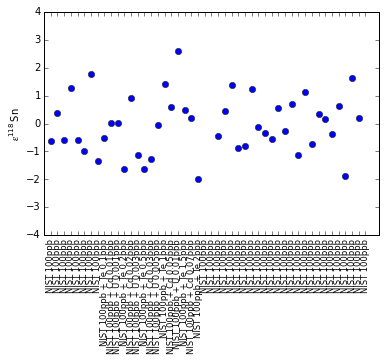

In [133]:
x = range(1, len(epsilon_comp["sample"])+1)
plot(x, epsilon_comp["112/120"], marker="o", ls="none")
ylim([-4, 4])
xticks(x, epsilon_comp["sample"], size='small', rotation=90)
ylabel(r'$\mathregular{\epsilon^{118}}$Sn')
#savefig(path+"epsilon_119.pdf", bbox_inches='tight')

In [16]:
df_all.to_csv(path_sav + "Sn_H8_L4_2_cycles_NU_Signals_zero_corr.csv", mode='a', header=False)

In [195]:
df_internal_sub.to_csv(path_sav + "Sn_H9_L4_1_cycles_internal_norm.csv", mode='a', header=False)

In [25]:
df_internal_norm_mean_sd.to_csv(path + "Sn_H8_L4_2_cycles_internal_norm_122_120_no_bgd_corr_mad.csv", mode='w', header=True)

In [1226]:
df_std.to_csv(path_sav + "All_standards_internal_norm_mean.csv")

In [986]:
df_all_mean_1 = pd.read_csv(path_sav + "Sn_H9_L4_1_cycles_internal_norm_mean.csv")

In [987]:
df_all_mean_2 = pd.read_csv(path_sav + "Sn_H8_L4_2_cycles_internal_norm_mean.csv")

In [1088]:
df_mean_all = df_all_mean_1.append(df_all_mean_2)

In [1089]:
df_mean_all = df_mean_all[2:]
df_mean_all.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
df_mean_all = df_mean_all[["Date", "112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118","sample"]]
df_mean_all = df_mean_all.set_index("Date") 

In [1182]:
df_std = df_mean_all[(df_mean_all["sample"] == "SPEX1 100ppb") | (df_mean_all["sample"] == "SPEX 100ppb") | (df_mean_all["sample"] == "NIST 100ppb")]
df_std

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-10-07 20:49:00,0.0298238495726,0.0201845997439,0.0103681594438,0.446,0.235295696368,0.742939518097,0.263445942562,0.142086185109,0.177571556759,10.1619395381,SPEX1 100ppb
2014-10-07 21:07:00,0.0298270855009,0.0201887834143,0.0103664239291,0.446,0.235295260593,0.742937654621,0.263447680516,0.14208571056,0.177573088542,10.2834847296,SPEX1 100ppb
2014-10-07 21:29:00,0.0298241010738,0.0201850728708,0.0103667030734,0.446,0.235295046713,0.742937732217,0.263449417694,0.142085954225,0.17757007419,10.0068814188,SPEX1 100ppb
2014-10-07 21:46:00,0.0298269719657,0.0201827454973,0.0103676568054,0.446,0.235297077525,0.742936157145,0.263450048386,0.142089277895,0.177573191934,10.1732362802,SPEX1 100ppb
2014-11-18 18:22:00,0.0298319477344,0.0201968060654,0.0103609914838,0.446,0.235308007067,0.74295144542,0.263456437295,0.142073025422,0.17753393783,11.9205622223,NIST 100ppb
2014-11-18 18:27:00,0.0298302415426,0.0202014506204,0.0103609667001,0.446,0.235304600881,0.742949759778,0.263451222795,0.142074064497,0.177531032284,11.8435340427,NIST 100ppb
2014-11-18 18:31:00,0.029834566445,0.0202024281122,0.0103608586407,0.446,0.235309236679,0.742955467382,0.263452936054,0.142073215452,0.177533064574,11.3634385069,NIST 100ppb
2014-11-18 18:36:00,0.0298236482085,0.0201946006554,0.0103617565758,0.446,0.235308318118,0.742946848523,0.263449990275,0.142074569672,0.177530832831,11.5416992302,NIST 100ppb
2014-11-18 18:40:00,0.0298227478429,0.0201921659888,0.0103615705949,0.446,0.235307461611,0.742950591745,0.263450041891,0.142075223065,0.177536326791,11.6314409578,NIST 100ppb


In [1183]:
df_std[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118"]] = df_std[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118"]].astype(float)
df_std.index = df_std.index.astype(datetime64)
df_std = df_std[(df_std.index < pd.Timestamp('2015-03-10')) | (df_std.index > pd.Timestamp('2015-03-12'))]
df_std = df_std[(df_std.index < pd.Timestamp('2014-11-29 18:25:00')) | (df_std.index > pd.Timestamp('2014-11-29 20:27:00'))]
df_std

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-10-07 18:49:00,0.029824,0.020185,0.010368,0.446,0.235296,0.742940,0.263446,0.142086,0.177572,10.161940,SPEX1 100ppb
2014-10-07 19:07:00,0.029827,0.020189,0.010366,0.446,0.235295,0.742938,0.263448,0.142086,0.177573,10.283485,SPEX1 100ppb
2014-10-07 19:29:00,0.029824,0.020185,0.010367,0.446,0.235295,0.742938,0.263449,0.142086,0.177570,10.006881,SPEX1 100ppb
2014-10-07 19:46:00,0.029827,0.020183,0.010368,0.446,0.235297,0.742936,0.263450,0.142089,0.177573,10.173236,SPEX1 100ppb
2014-11-18 17:22:00,0.029832,0.020197,0.010361,0.446,0.235308,0.742951,0.263456,0.142073,0.177534,11.920562,NIST 100ppb
2014-11-18 17:27:00,0.029830,0.020201,0.010361,0.446,0.235305,0.742950,0.263451,0.142074,0.177531,11.843534,NIST 100ppb
2014-11-18 17:31:00,0.029835,0.020202,0.010361,0.446,0.235309,0.742955,0.263453,0.142073,0.177533,11.363439,NIST 100ppb
2014-11-18 17:36:00,0.029824,0.020195,0.010362,0.446,0.235308,0.742947,0.263450,0.142075,0.177531,11.541699,NIST 100ppb
2014-11-18 17:40:00,0.029823,0.020192,0.010362,0.446,0.235307,0.742951,0.263450,0.142075,0.177536,11.631441,NIST 100ppb


In [1184]:
df_std = df_std[(df_std["118"] > 5) & (df_std["118/120"] > 0.7428)]
for i in df_std.index[df_std["sample"] == "SPEX1 100ppb"]:
    df_std.ix[i, "sample"] = "SPEX 100ppb"

In [1220]:
sample = df_std["sample"]
std_mean = df_std[(df_std["sample"] == "SPEX 100ppb")].mean()
new = df_std[df_std.columns[df_std.dtypes != 'object']]
epsilon =  ((new / std_mean)-1)*10000
epsilon["sample"] = sample
epsilon
epsilon[(epsilon["118/120"] > 0.4) | (epsilon["118/120"] < -0.4)]

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-11-18 18:54:00,-1.295126,-1.053575,1.608025,1.998401e-11,-1.180555,-0.463371,-0.356364,0.722133,2.010156,1309.494419,SPEX 100ppb
2014-12-06 22:37:00,-4.936059,-7.445774,1.331682,1.998401e-11,0.786625,0.539985,1.003885,0.222717,0.767402,-1614.119882,SPEX 100ppb
2014-12-06 22:52:00,-1.620072,-3.896472,0.536870,1.998401e-11,0.533814,0.527568,1.004705,0.469725,1.664357,-1804.778746,SPEX 100ppb
2014-12-06 23:08:00,-2.641746,-4.386719,2.125820,1.998401e-11,0.522416,0.475452,0.892735,0.462190,1.555222,-1848.039153,SPEX 100ppb
2014-12-06 23:23:00,-3.243182,-3.908338,-0.299309,1.998401e-11,0.613841,0.489401,0.951723,0.466426,1.660720,-1728.263406,SPEX 100ppb
2014-12-06 23:39:00,-3.174104,-5.626922,2.187946,1.998401e-11,0.711496,0.500329,0.913301,0.302836,1.500547,-1512.382276,SPEX 100ppb
2014-12-06 23:54:00,-2.499252,-3.686348,3.196847,1.998401e-11,0.532245,0.565307,0.943385,0.268384,1.570411,-1442.654967,SPEX 100ppb
2014-12-07 00:09:00,-3.167063,-4.997893,0.608021,1.998401e-11,0.745353,0.520016,1.039127,0.455542,1.559710,-1523.698889,SPEX 100ppb
2014-12-07 00:25:00,-2.027759,-4.105014,2.820000,1.998401e-11,0.605650,0.507195,0.913818,0.470145,1.538801,-1719.373397,SPEX 100ppb


In [1222]:
lee = pd.DataFrame({"112/120" : pd.Series(0.029812), "114/120" : pd.Series(0.020195), "115/120": pd.Series(0.010366), "116/120": pd.Series(0.4460), "117/120" : pd.Series(0.235313), "118/120" : pd.Series(0.742935), "119/120" : pd.Series(0.263430), "122/120" : pd.Series(0.142086), "124/120" : pd.Series(0.177588)})
epsilon_lee = ((lee / std_mean[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120"]])-1)*10000
epsilon_lee["sample"] = "Lee et al. (1995)"
epsilon_lee

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,sample
0,-4.252887,1.76055,-2.836398,1.998401e-11,0.6046,0.052729,-0.550984,0.411199,1.946529,Lee et al. (1995)
